# pNEUMA dataset
https://open-traffic.epfl.ch/

## References

Emmanouil Barmpounakis, Nikolas Geroliminis,
On the new era of urban traffic monitoring with massive drone data: The pNEUMA large-scale field experiment,
Transportation Research Part C: Emerging Technologies,
Volume 111,
2020,
Pages 50-71,
ISSN 0968-090X,
https://doi.org/10.1016/j.trc.2019.11.023.

In [1]:
import os
import csv
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import numpy as np
import datetime as dt
import contextily as ctx
import geopandas as gpd
import movingpandas as mpd

In [4]:
from datetime import timedelta
from geopandas import GeoDataFrame
from ipywidgets import IntSlider, interact

In [5]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [6]:
#import hdbscan
#import sklearn.utils
#from sklearn.cluster import DBSCAN
#from sklearn.preprocessing import StandardScaler
#from pydmd import DMD

In [7]:
def read_csv(path):
    metadata_cols = [
        'track_id',
        'type',
        'traveled_d',
        'avg_speed',
    ]
    data_cols = [
        'lat',
        'lon',
        'speed',
        'lat_acc',
        'lon_acc',
        'time',
        'track_id',
    ]

    metadata_colsize = len(metadata_cols)
    data_colsize = len(data_cols) - 1

    metadata_rows = list()
    data_rows = list()

    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        next(csv_reader)
        metadata = dict()
        for row in csv_reader:
            row = [item.strip() for item in row]
            track_id = int(row[0])
            metadata_rows.append(row[:metadata_colsize])

            data_traj = [
                float(item) for item in row[metadata_colsize:] if len(item) > 0
            ]
            for i in range(0, len(data_traj), data_colsize):
                data_row = data_traj[i:i + data_colsize] + [track_id]
                data_rows.append(data_row)

    data = pd.DataFrame(data_rows, columns=data_cols)
    metadata = pd.DataFrame(metadata_rows, columns=metadata_cols)
    metadata = metadata.set_index('track_id')
    metadata.index = metadata.index.astype(int)
    return metadata, data

In [8]:
files = []
root = os.getcwd()
path = './data/pNEUMA/'
os.chdir(path)
for file in glob.glob("*.csv"):
    files.append(file)
os.chdir(root)
urlpath = f'{path}{file}'
print(urlpath)

./data/pNEUMA/20181024_d1_0830_0900.csv


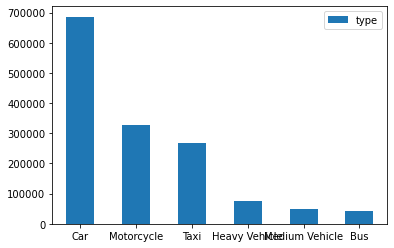

In [9]:
metadata, data = read_csv(urlpath)
df = pd.merge(metadata, data, left_index=True, right_on='track_id')
df['traveled_d'] = df.traveled_d.astype(float)
ax = df.type.value_counts(dropna=False).plot.bar(rot=0, legend=True)

In [10]:
sample = df#[(df.track_id <= 100)]
sample['timestamp'] = sample.apply(
    lambda x: dt.datetime(2018, 10, 24, 8, 30) + timedelta(seconds=x.time),
    axis=1)
sample = sample.set_index('timestamp')

In [34]:
sample

type  traveled_d  avg_speed   lat   lon  speed  \
timestamp                                                                
2018-10-24 08:30:00.000  Car       48.85   9.770344 37.98 23.74   4.92   
2018-10-24 08:30:00.040  Car       48.85   9.770344 37.98 23.74   4.92   
2018-10-24 08:30:00.080  Car       48.85   9.770344 37.98 23.74   4.92   
2018-10-24 08:30:00.120  Car       48.85   9.770344 37.98 23.74   4.91   
2018-10-24 08:30:00.160  Car       48.85   9.770344 37.98 23.74   4.89   
...                      ...         ...        ...   ...   ...    ...   
2018-10-24 08:43:38.640  Car       35.00  23.335533 37.98 23.74  21.34   
2018-10-24 08:43:38.680  Car       35.00  23.335533 37.98 23.74  21.33   
2018-10-24 08:43:38.720  Car       35.00  23.335533 37.98 23.74  21.32   
2018-10-24 08:43:38.760  Car       35.00  23.335533 37.98 23.74  21.31   
2018-10-24 08:43:38.800  Car       35.00  23.335533 37.98 23.74  21.29   

                         lat_acc  lon_acc   time  track_id  \
timestamp                                                    
2018-10-24 08:30:00.000     0.05    -0.03   0.00         1   
2018-10-24 08:30:00.040    -0.01    -0.04   0.04         1   
2018-10-24 08:30:00.080    -0.05    -0.04   0.08         1   
2018-10-24 08:30:00.120    -0.09    -0.05   0.12         1   
2018-10-24 08:30:00.160    -0.17    -0.06   0.16         1   
...                          ...      ...    ...       ...   
2018-10-24 08:43:38.640    -0.14    -0.07 818.64       922   
2018-10-24 08:43:38.680    -0.15    -0.06 818.68       922   
2018-10-24 08:43:38.720    -0.17    -0.06 818.72       922   
2018-10-24 08:43:38.760    -0.20    -0.06 818.76       922   
2018-10-24 08:43:38.800    -0.22    -0.05 818.80       922   

                                          geometry  
timestamp                                           
2018-10-24 08:30:00.000  POINT (23.73769 37.97739)  
2018-10-24 08:30:00.040  POINT (23.73769 37.97739)  
2018-10-24 08:30:00.080  POINT (23.73769 37.97739)  
2018-10-24 08:30:00.120  POINT (23.73769 37.97739)  
2018-10-24 08:30:00.160  POINT (23.73769 37.97739)  
...                                            ...  
2018-10-24 08:43:38.640  POINT (23.73587 37.97860)  
2018-10-24 08:43:38.680  POINT (23.73587 37.97860)  
2018-10-24 08:43:38.720  POINT (23.73587 37.97860)  
2018-10-24 08:43:38.760  POINT (23.73587 37.97860)  
2018-10-24 08:43:38.800  POINT (23.73588 37.97860)  

[1446887 rows x 11 columns]

In [11]:
# Initialize points in ETRS89 reference system.
geolocations = gpd.GeoDataFrame(sample,
                                geometry=gpd.points_from_xy(
                                    sample.lon,
                                    sample.lat,
                                    crs={'init': 'epsg:4326'}))
geolocations.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
%%time
trajectories = []
for key, values in geolocations.groupby(['track_id']):
    try:
        trajectory = mpd.Trajectory(values, key)
        if trajectory.df.shape[0] > 1:
            trajectories.append(trajectory)
    except:
        pass

print("Finished creating {} trajectories".format(len(trajectories)))

Finished creating 922 trajectories
CPU times: user 1.16 s, sys: 44.1 ms, total: 1.2 s
Wall time: 1.2 s


In [14]:
traj_collection = mpd.TrajectoryCollection(trajectories[:])
print(traj_collection)

TrajectoryCollection with 922 trajectories


In [15]:
# Convert to Pseudo-Mercator for cartography.
geolocations = geolocations.to_crs(epsg=3857)
geolocations.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
def get_locations_at_timestamps(col, t):
    pos = []
    for traj in col.trajectories:
        if t >= traj.get_start_time() and t <= traj.get_end_time():
            pos.append({
                'geometry': traj.get_position_at(t),
                'id': str(traj.id),
                'type': traj.df['type'].values[0]
            })
    return GeoDataFrame(pd.DataFrame(pos), crs=traj.crs)

In [17]:
# Extract x, y and c from geopandas.
lat = geolocations.geometry.y
lon = geolocations.geometry.x
c = geolocations.speed

In [18]:
# Specify maptiles source.
basemap = ctx.providers.CartoDB.DarkMatter

In [19]:
@interact(i=(0, geolocations.time.max(), 0.5))
def plot(i=0):
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.scatter(lon, lat, c=c, s=0.05, ec=None, cmap='plasma')

    t = dt.datetime(2018, 10, 24, 8, 30) + timedelta(seconds=i)
    points = get_locations_at_timestamps(traj_collection, t)
    points = points.to_crs(epsg=3857)
    sizes = {
        'Car': 30,
        'Taxi': 30,
        'Bus' : 90,
        'Motorcycle': 5,
        'Medium Vehicle': 50,
        'Heavy Vehicle': 90
    }
    colors = {
        'Car': 'white',
        'Taxi': 'gold',
        'Bus' : 'royalblue',
        'Motorcycle': 'crimson',
        'Medium Vehicle': 'saddlebrown',
        'Heavy Vehicle': 'darkgreen'
    }
    points['sizes'] = points['type'].map(sizes)
    points['colors'] = points['type'].map(colors)
    lat1 = points.geometry.y
    lon1 = points.geometry.x
    sizes = points['sizes']
    colors = points['colors']
    ax.scatter(lon1, lat1, s=sizes, ec=None, c=colors)
    ax.set_axis_off()
    ctx.add_basemap(ax, attribution=False, source=basemap, zoom=18)

interactive(children=(FloatSlider(value=0.0, description='i', max=818.8, step=0.5), Output()), _dom_classes=('…

In [91]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap

map_con = InMemMap("mymap", graph={
    "A": ((1, 1), ["B", "C", "X"]),
    "B": ((1, 3), ["A", "C", "D", "K"]),
    "C": ((2, 2), ["A", "B", "D", "E", "X", "Y"]),
    "D": ((2, 4), ["B", "C", "F", "E", "K", "L"]),
    "E": ((3, 3), ["C", "D", "F", "Y"]),
    "F": ((3, 5), ["D", "E", "L"]),
    "X": ((2, 0), ["A", "C", "Y"]),
    "Y": ((3, 1), ["X", "C", "E"]),
    "K": ((1, 5), ["B", "D", "L"]),
    "L": ((2, 6), ["K", "D", "F"])
}, use_latlon=False)

path = [(0.8, 0.7), (0.9, 0.7), (1.1, 1.0), (1.2, 1.5), (1.2, 1.6), (1.1, 2.0),
        (1.1, 2.3), (1.3, 2.9), (1.2, 3.1), (1.5, 3.2), (1.8, 3.5), (2.0, 3.7),
        (2.3, 3.5), (2.4, 3.2), (2.6, 3.1), (2.9, 3.1), (3.0, 3.2),
        (3.1, 3.8), (3.0, 4.0), (3.1, 4.3), (3.1, 4.6), (3.0, 4.9)]

matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[('X', 'A'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('B', 'D'), ('B', 'D'), ('B', 'D'), ('B', 'D'), ('D', 'E'), ('D', 'E'), ('D', 'E'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F')]
Nodes
------
['X', 'A', 'B', 'D', 'E', 'F']

Stats lattice
-------------
nbr levels               : 22
nbr lattice              : 1002
avg lattice[level]       : 45.54545454545455
min lattice[level]       : 7
max lattice[level]       : 97
avg obs distance         : 0.15514927458475236
last logprob             : -0.5464565099511667
last length              : 22
last norm logprob        : -0.024838932270507576


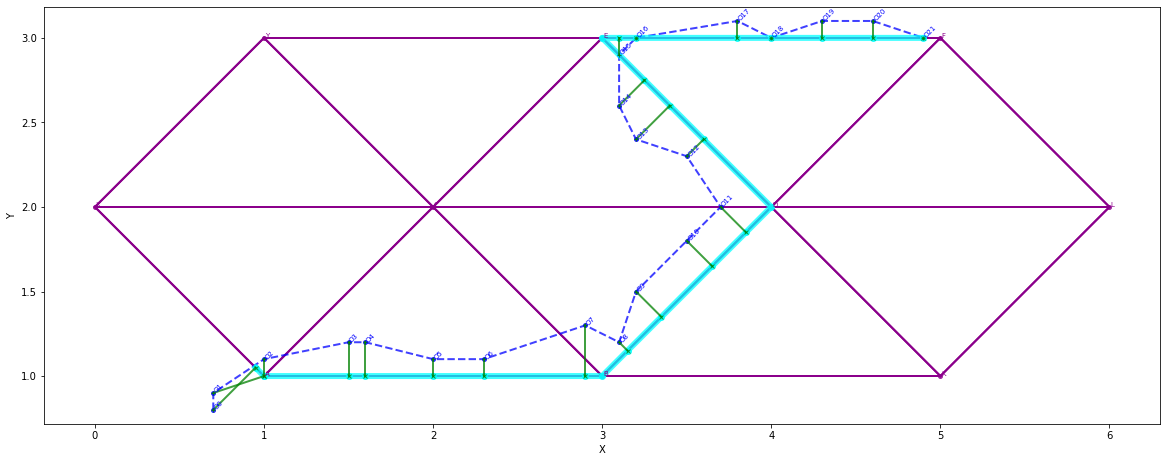

In [92]:
from leuvenmapmatching import visualization as mmviz
mmviz.plot_map(map_con, matcher=matcher,
               show_labels=True, show_matching=True, show_graph=True)
plt.show()

In [50]:
import osmnx as ox

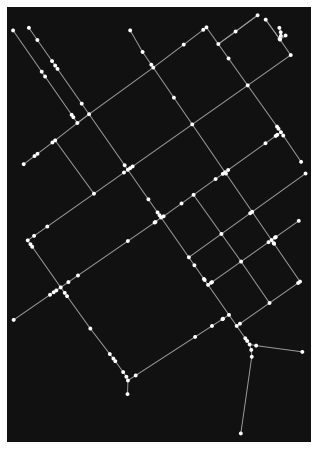

In [192]:
G = ox.graph_from_bbox(sample.lat.max(),
                       sample.lat.min(),
                       sample.lon.max(),
                       sample.lon.min(),
                       simplify=False,
                       retain_all=False,
                       truncate_by_edge=True,
                       clean_periphery = False,
                       network_type='drive')
G_projected = ox.project_graph(G)
ax = ox.plot_graph(G_projected)

In [193]:
nodes, streets = ox.graph_to_gdfs(G, nodes=True, edges=True)
streets[streets.name == 'Ακαδημίας']

osmid  oneway lanes       name      highway  \
u          v          key                                                    
250691739  250691794  0    299644700    True     4  Ακαδημίας    secondary   
250691755  250692359  0    299644700    True     4  Ακαδημίας    secondary   
250691791  6943530635 0    298828555    True     3  Ακαδημίας    secondary   
250691793  952119913  0    299644700    True     4  Ακαδημίας    secondary   
250691794  250691793  0    299644700    True     4  Ακαδημίας    secondary   
250691795  6175368842 0    168914458    True     4  Ακαδημίας    secondary   
250692359  2183589979 0    299644700    True     4  Ακαδημίας    secondary   
300400470  4947155945 0    299510529    True     4  Ακαδημίας    secondary   
653971361  2202283483 0    887094764    True     1  Ακαδημίας  residential   
808033514  7900885209 0     23183967    True     1  Ακαδημίας  residential   
808033687  2327652795 0    167907737    True     4  Ακαδημίας    secondary   
952119412  6220792260 0    299644700    True     4  Ακαδημίας    secondary   
952119440  250691755  0    299510529    True     4  Ακαδημίας    secondary   
952119913  952119412  0    299644700    True     4  Ακαδημίας    secondary   
952119963  250691739  0    299644700    True     4  Ακαδημίας    secondary   
1792445558 2327652835 0    167907737    True     4  Ακαδημίας    secondary   
1818038840 1792445558 0    167907737    True     4  Ακαδημίας    secondary   
2183589979 7620289780 0    299644700    True     4  Ακαδημίας    secondary   
2202283483 2317409213 0    887094764    True     1  Ακαδημίας  residential   
2202283515 808033687  0    167907737    True     4  Ακαδημίας    secondary   
2317409213 250709255  0    887094764    True     1  Ακαδημίας  residential   
2327652795 250691795  0    316770031    True     4  Ακαδημίας    secondary   
2327652835 2202283515 0    167907737    True     4  Ακαδημίας    secondary   
4947155945 7620257332 0    299510529    True     4  Ακαδημίας    secondary   
6175368842 300400470  0    168914458    True     4  Ακαδημίας    secondary   
6220792260 250691791  0    298828555    True     3  Ακαδημίας    secondary   
6943530635 250691788  0    298828555    True     3  Ακαδημίας    secondary   
7620257332 952119440  0    299510529    True     4  Ακαδημίας    secondary   
7620289780 952119963  0    299644700    True     4  Ακαδημίας    secondary   
7900885209 653971361  0     23183967    True     1  Ακαδημίας  residential   

                          maxspeed  length  \
u          v          key                    
250691739  250691794  0        NaN   51.10   
250691755  250692359  0        NaN   67.92   
250691791  6943530635 0        NaN    9.64   
250691793  952119913  0        NaN   21.01   
250691794  250691793  0        NaN   18.88   
250691795  6175368842 0        NaN   87.02   
250692359  2183589979 0        NaN   13.56   
300400470  4947155945 0        NaN   50.33   
653971361  2202283483 0        NaN   65.12   
808033514  7900885209 0        NaN   70.25   
808033687  2327652795 0        NaN   59.23   
952119412  6220792260 0        NaN    5.97   
952119440  250691755  0        NaN    3.78   
952119913  952119412  0        NaN    4.53   
952119963  250691739  0        NaN    8.33   
1792445558 2327652835 0        NaN   35.92   
1818038840 1792445558 0        NaN   20.72   
2183589979 7620289780 0        NaN   23.34   
2202283483 2317409213 0        NaN    4.10   
2202283515 808033687  0        NaN    5.68   
2317409213 250709255  0        NaN    9.89   
2327652795 250691795  0        NaN   17.98   
2327652835 2202283515 0        NaN    7.63   
4947155945 7620257332 0        NaN   22.31   
6175368842 300400470  0        NaN    7.74   
6220792260 250691791  0        NaN    7.97   
6943530635 250691788  0        NaN  108.39   
7620257332 952119440  0        NaN    4.82   
7620289780 952119963  0        NaN    1.79   
7900885209 653971361  0        NaN    8.27   

                                                             

In [194]:
nodes

y     x          highway  ref                   geometry
osmid                                                                  
42239274   37.98 23.74  traffic_signals  NaN  POINT (23.73570 37.97713)
42239277   37.98 23.74         crossing  NaN  POINT (23.73567 37.97717)
250691695  37.98 23.74              NaN  NaN  POINT (23.73561 37.97722)
250691717  37.98 23.74              NaN  NaN  POINT (23.73698 37.97741)
250691723  37.98 23.73              NaN  NaN  POINT (23.73486 37.97808)
...          ...   ...              ...  ...                        ...
7620289781 37.98 23.74  traffic_signals  NaN  POINT (23.73727 37.97809)
7620328093 37.98 23.74             stop  NaN  POINT (23.73864 37.97805)
7643867362 37.98 23.74              NaN  NaN  POINT (23.73856 37.98117)
7900885209 37.98 23.73              NaN  NaN  POINT (23.73466 37.98080)
8220902074 37.98 23.73              NaN  NaN  POINT (23.73479 37.97804)

[129 rows x 5 columns]

In [195]:
import folium

In [196]:
style = {'weight':2}
m = folium.Map([sample.lat.mean(), sample.lon.mean()],
               zoom_start=16.5,
               tiles='CartoDb dark_matter')
folium.GeoJson(streets.geometry, style_function=lambda x: style).add_to(m)
m